1 이미지 인식

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
# 학습에 사용될 데이터를 x로, 테스트에 사용될 데이터는 y로 지정.
(x_train, y_train), (x_test, y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# 분리된 데이터의 수 출력 및 비율 확인.
print('학습셋 이미지 수: %d개' % (x_train.shape[0]))
print('데이터셋 이미지 수: %d개' % (x_test.shape[0]))

학습셋 이미지 수: 60000개
데이터셋 이미지 수: 10000개


In [4]:
import matplotlib.pyplot as plt
from keras.utils import np_utils
import sys

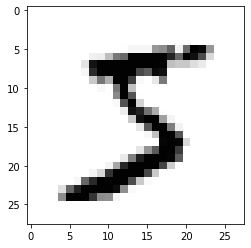

In [5]:
# 임위의 이미지를 선택해 그래프화.
plt.imshow(x_train[0], cmap= 'Greys')
plt.show()

In [6]:
# 각 픽셀의 밝기는 0~255까지 임으로 이미지의 숫자를 밝기의 단위로 변환.
for x in x_train[0]:
  for i in x:
    sys.stdout.write('%-3s' % i) # 'stdout.write' == 'print' 성능이 더 좋음.
  sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [7]:
# 가로 28, 세로 28의 2차원 배열을 1차원으로 변환.
x_train= x_train.reshape(x_train.shape[0], 784)

In [8]:
# 0~255 사이의 값으로 이루어진 값을 0~1 사이의 값으로 변환하기 위해 각 값을 255로 나눔.
x_train= x_train.astype('float64')
x_train= x_train/255

x_test= x_test.reshape(x_test.shape[0], 784).astype('float64')/255

In [9]:
# 이미지의 숫자의 레이블이 무엇인지 확인.
print('class: %d' % (y_train[0]))

class: 5


In [10]:
# 이미지의 클래스를 1차원 배열로 변환.(Ex [0,0,0,0,0,1...])
y_train= np_utils.to_categorical(y_train, 10) # 'to_categorical=' 1차원으로 변환하는 함수.
y_test= np_utils.to_categorical(y_test, 10)

# 출력
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


2 기본 프레임 만들기

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
import numpy as np
import os

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________

Epoch 1: val_loss improved from inf to 0.20078, saving model to ./MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.20078 to 0.13525, saving model to ./MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13525 to 0.11022, saving model to ./MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11022 to 0.10037, saving model to ./MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.10037 to 0.09610, saving model to ./MNIST_MLP.hdf5

Epoch 6: val_loss i

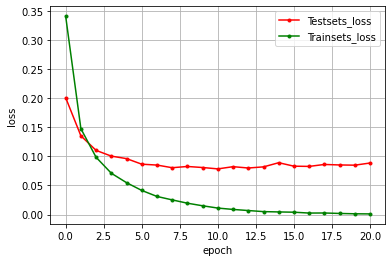

In [12]:
# MNIST 데이터 불러오기.
(x_train, y_train), (x_test, y_test)= mnist.load_data()

# 차원 변환 후, 테스트셋과 학습셋으로 분활.
x_train= x_train.reshape(x_train.shape[0], 784).astype('float64')/255  
x_test= x_test.reshape(x_test.shape[0], 784).astype('float64')/255  

y_train= np_utils.to_categorical(y_train, 10) 
y_test= np_utils.to_categorical(y_test, 10)

# 모델 구조 설정.
model= Sequential()
model.add(Dense(512, input_dim= 784, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))
model.summary()

# 모델 실행 환경 설정.
model.compile(loss= 'categorical_crossentropy', optimizer= 'adam',
              metrics= ['accuracy'])

# 모델 최적화.
modelpath= './MNIST_MLP.hdf5'
checkpointer= ModelCheckpoint(filepath= modelpath, monitor= 'val_loss',
                              verbose= 1, save_best_only= True)
early_stopping_callback= EarlyStopping(monitor= 'val_loss', patience= 10)

# 모델 실행.
history= model.fit(x_train, y_train, validation_split= .25,
                   epochs= 30, batch_size= 200, verbose= 0,
                   callbacks= [early_stopping_callback, checkpointer])

# 테스트 정확도 출력.
print('\n Test Accuracy: %.4f' % (model.evaluate(x_test, y_test)[1]))

# 검출셋과 학습셋의 오차 저장.
y_vloss= history.history['val_loss']
y_loss= history.history['loss']

# 그래프로 표현.
x_len= np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker= '.', c= 'red', label= 'Testsets_loss')
plt.plot(x_len, y_loss, marker= '.', c= 'green', label= 'Trainsets_loss')

# 그래프에 그리드를 주고 레이블 표시.
plt.legend(loc= 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

컨볼루션 신경망(CNN) 적용용

In [13]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np


Epoch 1: val_loss improved from inf to 0.08650, saving model to ./MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.08650 to 0.05832, saving model to ./MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05832 to 0.04727, saving model to ./MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.04727 to 0.04370, saving model to ./MNIST_CNN.hdf5

Epoch 5: val_loss did not improve from 0.04370

Epoch 6: val_loss did not improve from 0.04370

Epoch 7: val_loss improved from 0.04370 to 0.04160, saving model to ./MNIST_CNN.hdf5

Epoch 8: val_loss did not improve from 0.04160

Epoch 9: val_loss did not improve from 0.04160

Epoch 10: val_loss improved from 0.04160 to 0.04149, saving model to ./MNIST_CNN.hdf5

Epoch 11: val_loss improved from 0.04149 to 0.04088, saving model to ./MNIST_CNN.hdf5

Epoch 12: val_loss did not improve from 0.04088

Epoch 13: val_loss did not improve from 0.04088

Epoch 14: val_loss did not improve from 0.04088

Epoch 15: val_loss did not improve from 0.04088

Epoch 16: v

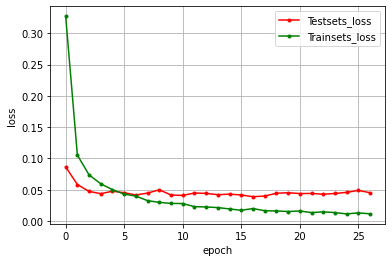

In [14]:
# 데이터 불러오기.
(x_train, y_train), (x_test, y_test)= mnist.load_data()
x_train= x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float64')/255  
x_test= x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float64')/255  
y_train= np_utils.to_categorical(y_train, 10) 
y_test= np_utils.to_categorical(y_test, 10)

# 컨볼루션 신경망의 설정.
model= Sequential()
model.add(Conv2D(32, kernel_size= (3, 3), input_shape= (28, 28, 1),
                 activation= 'relu'))
model.add(Conv2D(64, (3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(.25))
model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dropout(.5))
model.add(Dense(10, activation= 'softmax'))

# 모델의 실행 옵션 설정.
model.compile(loss= 'categorical_crossentropy', optimizer= 'adam',
              metrics= ['accuracy'])

# 모델 최적화 설정.
modelpath= './MNIST_CNN.hdf5'
checkpointer= ModelCheckpoint(filepath= modelpath, monitor= 'val_loss',
                              verbose= 1, save_best_only= True)
early_stopping_callback= EarlyStopping(monitor= 'val_loss', patience= 10)

# 모델 실행.
history= model.fit(x_train, y_train, validation_split= .25,
                   epochs= 30, batch_size= 200, verbose= 0,
                   callbacks= [early_stopping_callback, checkpointer])

# 테스트 정확도 출력.
print('\n Test Accuracy: %.4f' % (model.evaluate(x_test, y_test)[1]))

# 검증셋과 학습셋의 오차 저장.
y_vloss= history.history['val_loss']
y_loss= history.history['loss']

# 그래프로 표현.
x_len= np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker= '.', c= 'red', label= 'Testsets_loss')
plt.plot(x_len, y_loss, marker= '.', c= 'green', label= 'Trainsets_loss')

# 그래프에 그리드를 주고 레이블 표시.
plt.legend(loc= 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()